In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import tensorboard
from matplotlib import pyplot as plt
import datetime, os

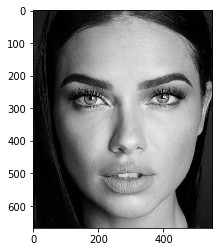

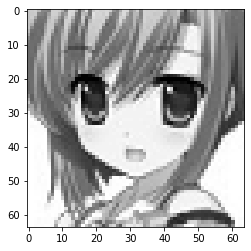

In [56]:
DATADIR = "C:/Users/eliel/OneDrive/Bureau/database"
CATEGORIES = ["0","1"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

In [57]:
%reload_ext tensorboard

In [58]:
training_data = []
IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
            
create_training_data()

In [59]:
print(len(training_data))

39083


In [60]:
random.shuffle(training_data)

In [76]:
X = []
Y = []

In [77]:
for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y = np.array(Y)

In [78]:
#pickle_out = open("X.pickle","wb")
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open("Y.pickle","wb")
#pickle.dump(Y, pickle_out)
#pickle_out.close()

In [79]:
#X = pickle.load(open("X.pickle","rb"))
#Y = pickle.load(open("Y.pickle","rb"))

X = X/255.0

In [80]:
l = len(Y)

In [81]:
model = Sequential()

model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 256)     

In [82]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
#model.compile(optimizer = opt, loss='sparse_categorical_crossenropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [84]:
history = model.fit(X,Y,batch_size = 32 , epochs = 2, validation_split = 0.2)

Epoch 1/2
 14/978 [..............................] - ETA: 8:39 - loss: 0.0832 - accuracy: 0.9710

KeyboardInterrupt: 

In [43]:
%tensorboard --logdir logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


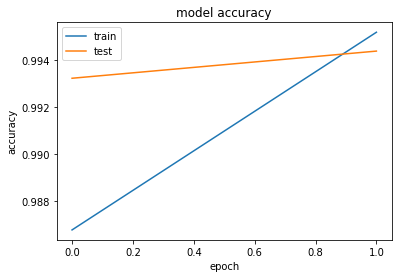

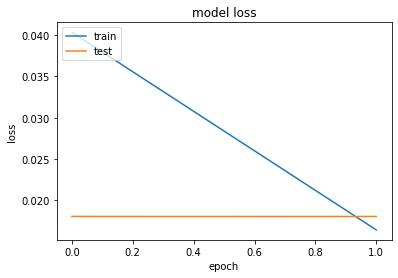

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()